In [ ]:
# Install packages
%pip install pandas 
%pip install matplotlib
%pip install np

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
financials_df = pd.read_csv("supplemental_files/financials.csv")
options_df = pd.read_csv("supplemental_files/options.csv", low_memory=False)
primary_df = pd.read_csv("supplemental_files/stock_prices.csv")
secondary_df = pd.read_csv("supplemental_files/secondary_stock_prices.csv")
stock_prices_df = pd.concat([primary_df, secondary_df], ignore_index=True)
trades_df = pd.read_csv("supplemental_files/trades.csv")
stock_list_df = pd.read_csv("stock_list.csv")
financials_df = pd.read_csv("example_test_files/financials.csv")

In [38]:
options_df.describe()

,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,DaySessionOpen,DaySessionHigh,DaySessionLow,DaySessionClose,TradingVolume,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
count,5.845020e+05,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,...,584502.0,5.845020e+05,5.845020e+05,584502.000000,584502.000000,584502.000000,584502.000000,584502.000000,584502.0,584502.0
mean,1.582607e+08,19.729062,21.273419,18.174651,19.545408,16.032902,16.927973,15.195134,15.994804,21.799120,...,1.5,2.024363e+07,2.024363e+07,4425.029682,4432.426701,21.854107,23.646864,0.140076,0.0,0.0
std,2.451935e+07,145.005480,150.473759,140.141786,145.138672,127.235368,130.568861,124.386106,127.456602,208.026933,...,0.5,2.314070e+04,2.314067e+04,4398.124472,4385.851678,4.156300,14.642825,0.037464,0.0,0.0
min,1.300600e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.021121e+07,2.021121e+07,1.000000,0.000000,13.291300,1.000000,-0.020900,0.0,0.0
25%,1.380302e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.022091e+07,2.022091e+07,945.000000,942.812025,18.604400,19.308800,0.136400,0.0,0.0
50%,1.470787e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.5,2.024061e+07,2.024061e+07,2980.000000,3019.880800,21.590850,20.636900,0.156400,0.0,0.0
75%,1.870937e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,2.026121e+07,2.026121e+07,6695.000000,6697.280000,24.520000,24.416600,0.160000,0.0,0.0
max,1.992480e+08,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,16507.000000,...,2.0,2.030061e+07,2.030061e+07,24130.000000,23912.211400,33.489550,320.000000,0.169100,0.0,0.0


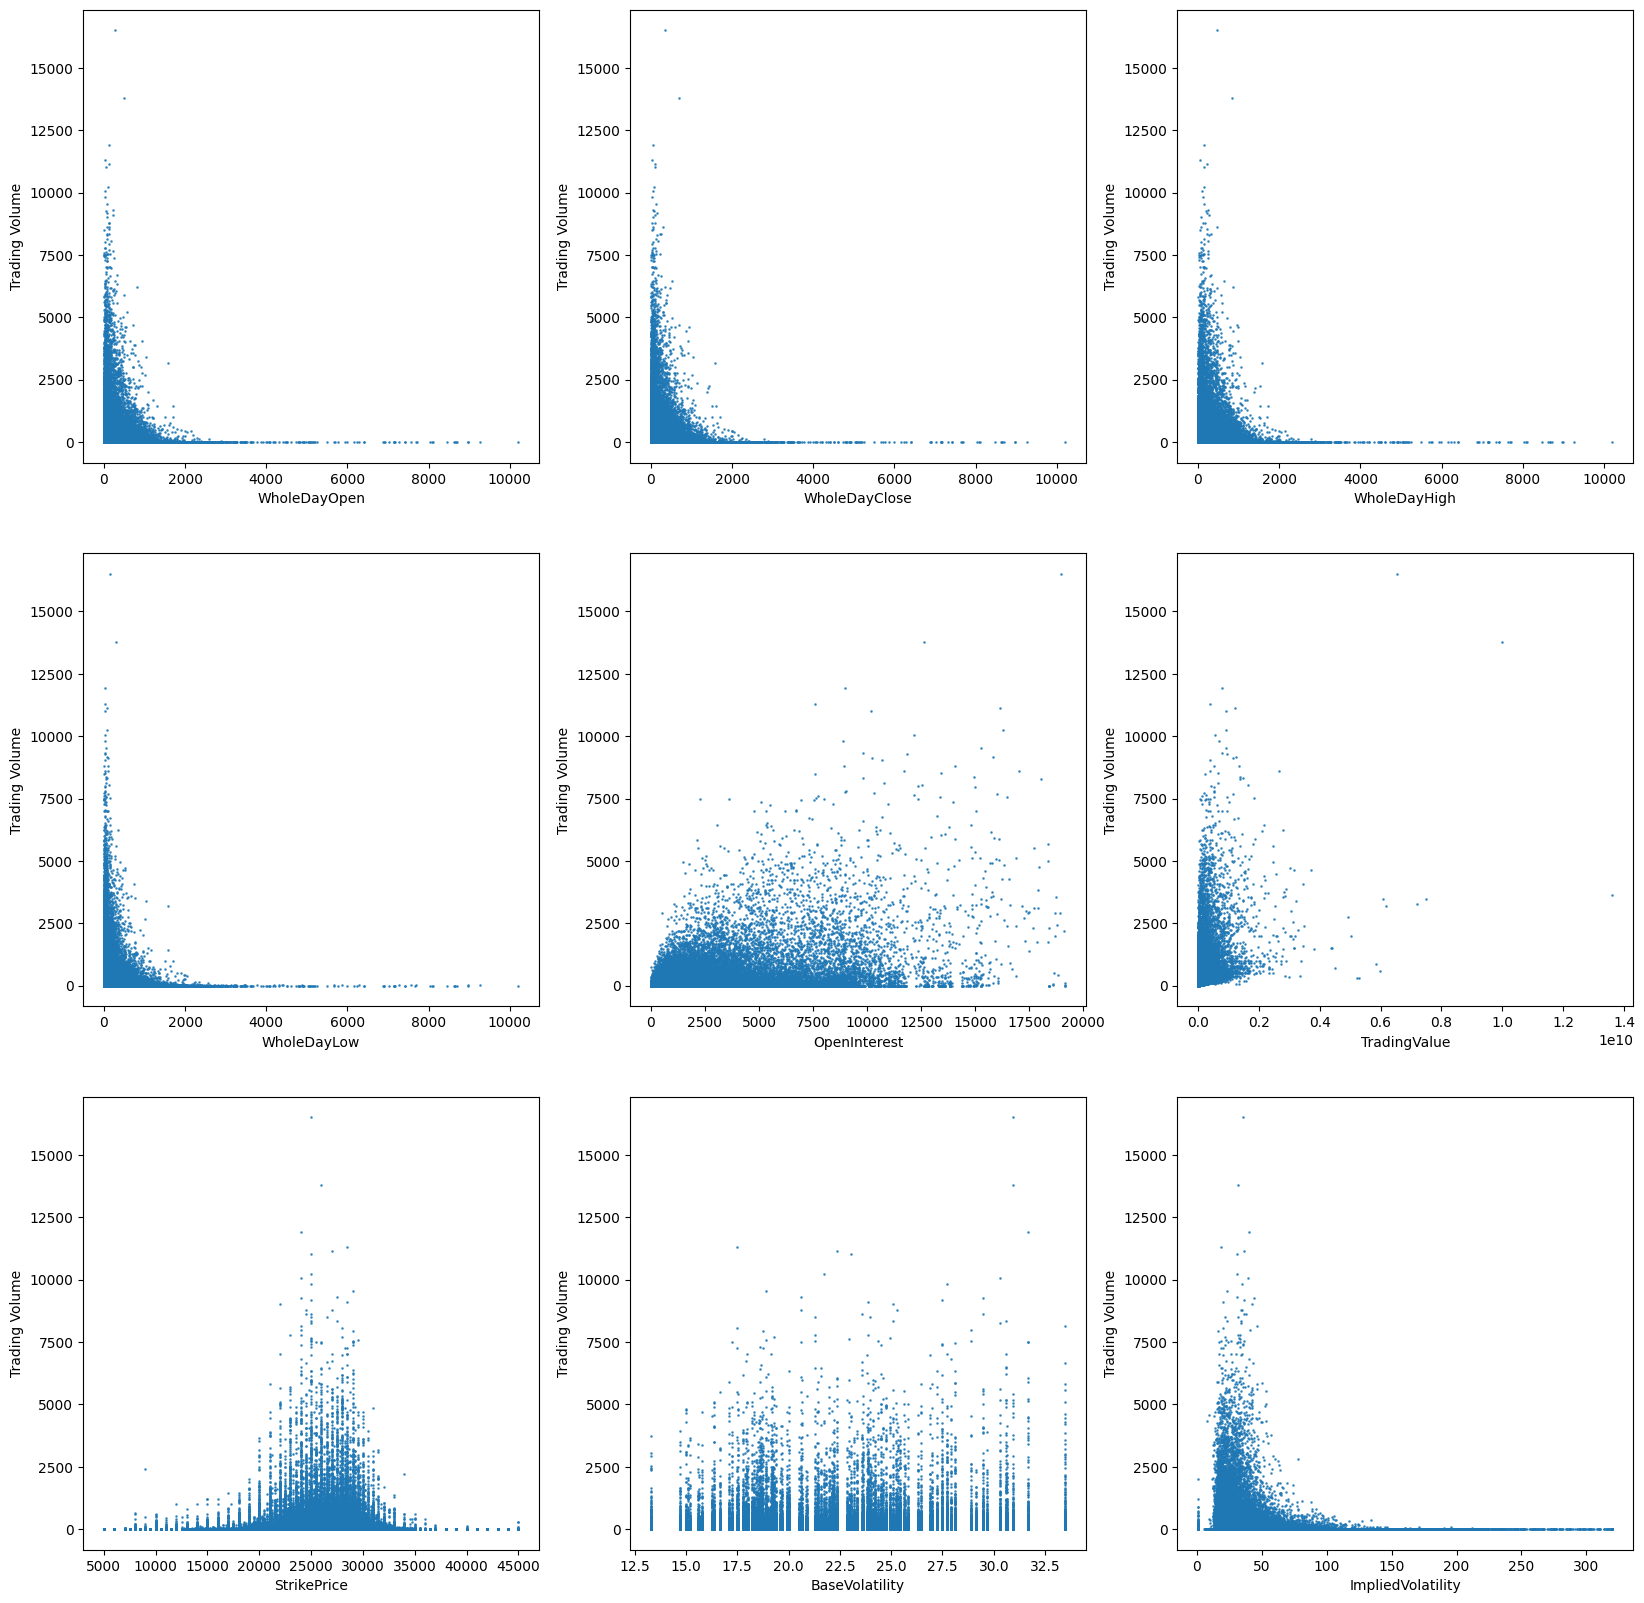

In [39]:
#taking trading volume as target value
x_val = ['WholeDayOpen', 'WholeDayClose', 'WholeDayHigh', 'WholeDayLow', 'OpenInterest', 'TradingValue', 'StrikePrice', 'BaseVolatility', 'ImpliedVolatility']

plot, axes = plt.subplots(3, 3, figsize = (20, 20))

for i, a in enumerate(axes.flat):
    a.scatter(x=options_df[x_val[i]], y=options_df["TradingVolume"], s=3, alpha = 0.8, marker='.')
    a.set_xlabel(x_val[i])
    a.set_ylabel('Trading Volume')

plt.show()

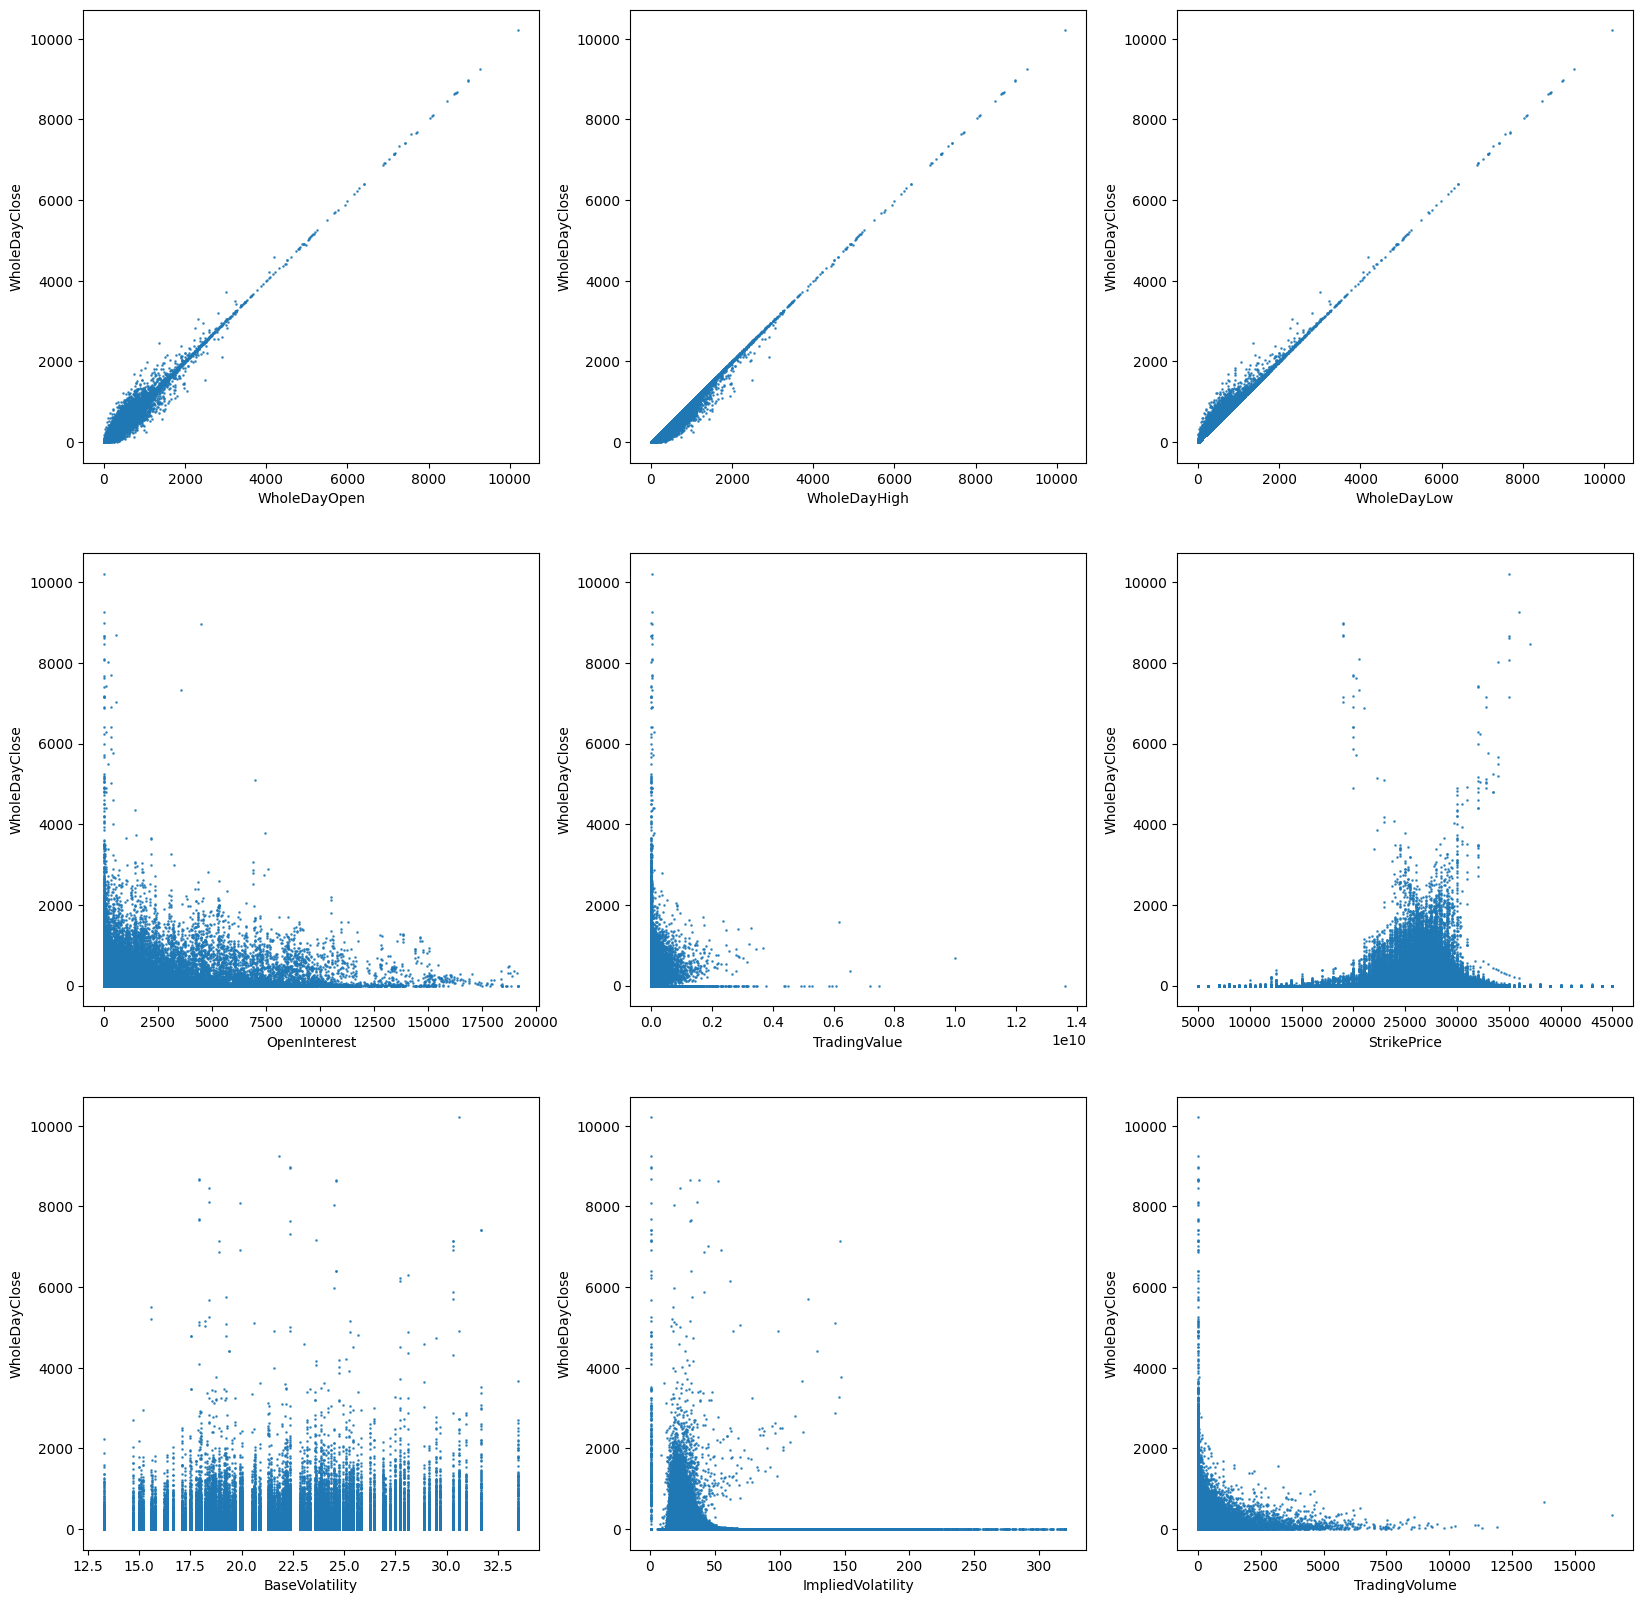

In [40]:
#taking WholeDayClose as target value
x_val = ['WholeDayOpen', 'WholeDayHigh', 'WholeDayLow', 'OpenInterest', 'TradingValue', 'StrikePrice', 'BaseVolatility', 'ImpliedVolatility', 'TradingVolume']

plot, axes = plt.subplots(3, 3, figsize = (20, 20))

for i, a in enumerate(axes.flat):
    a.scatter(x=options_df[x_val[i]], y=options_df["WholeDayClose"], s=3, alpha = 0.8, marker='.')
    a.set_xlabel(x_val[i])
    a.set_ylabel('WholeDayClose')

plt.show()

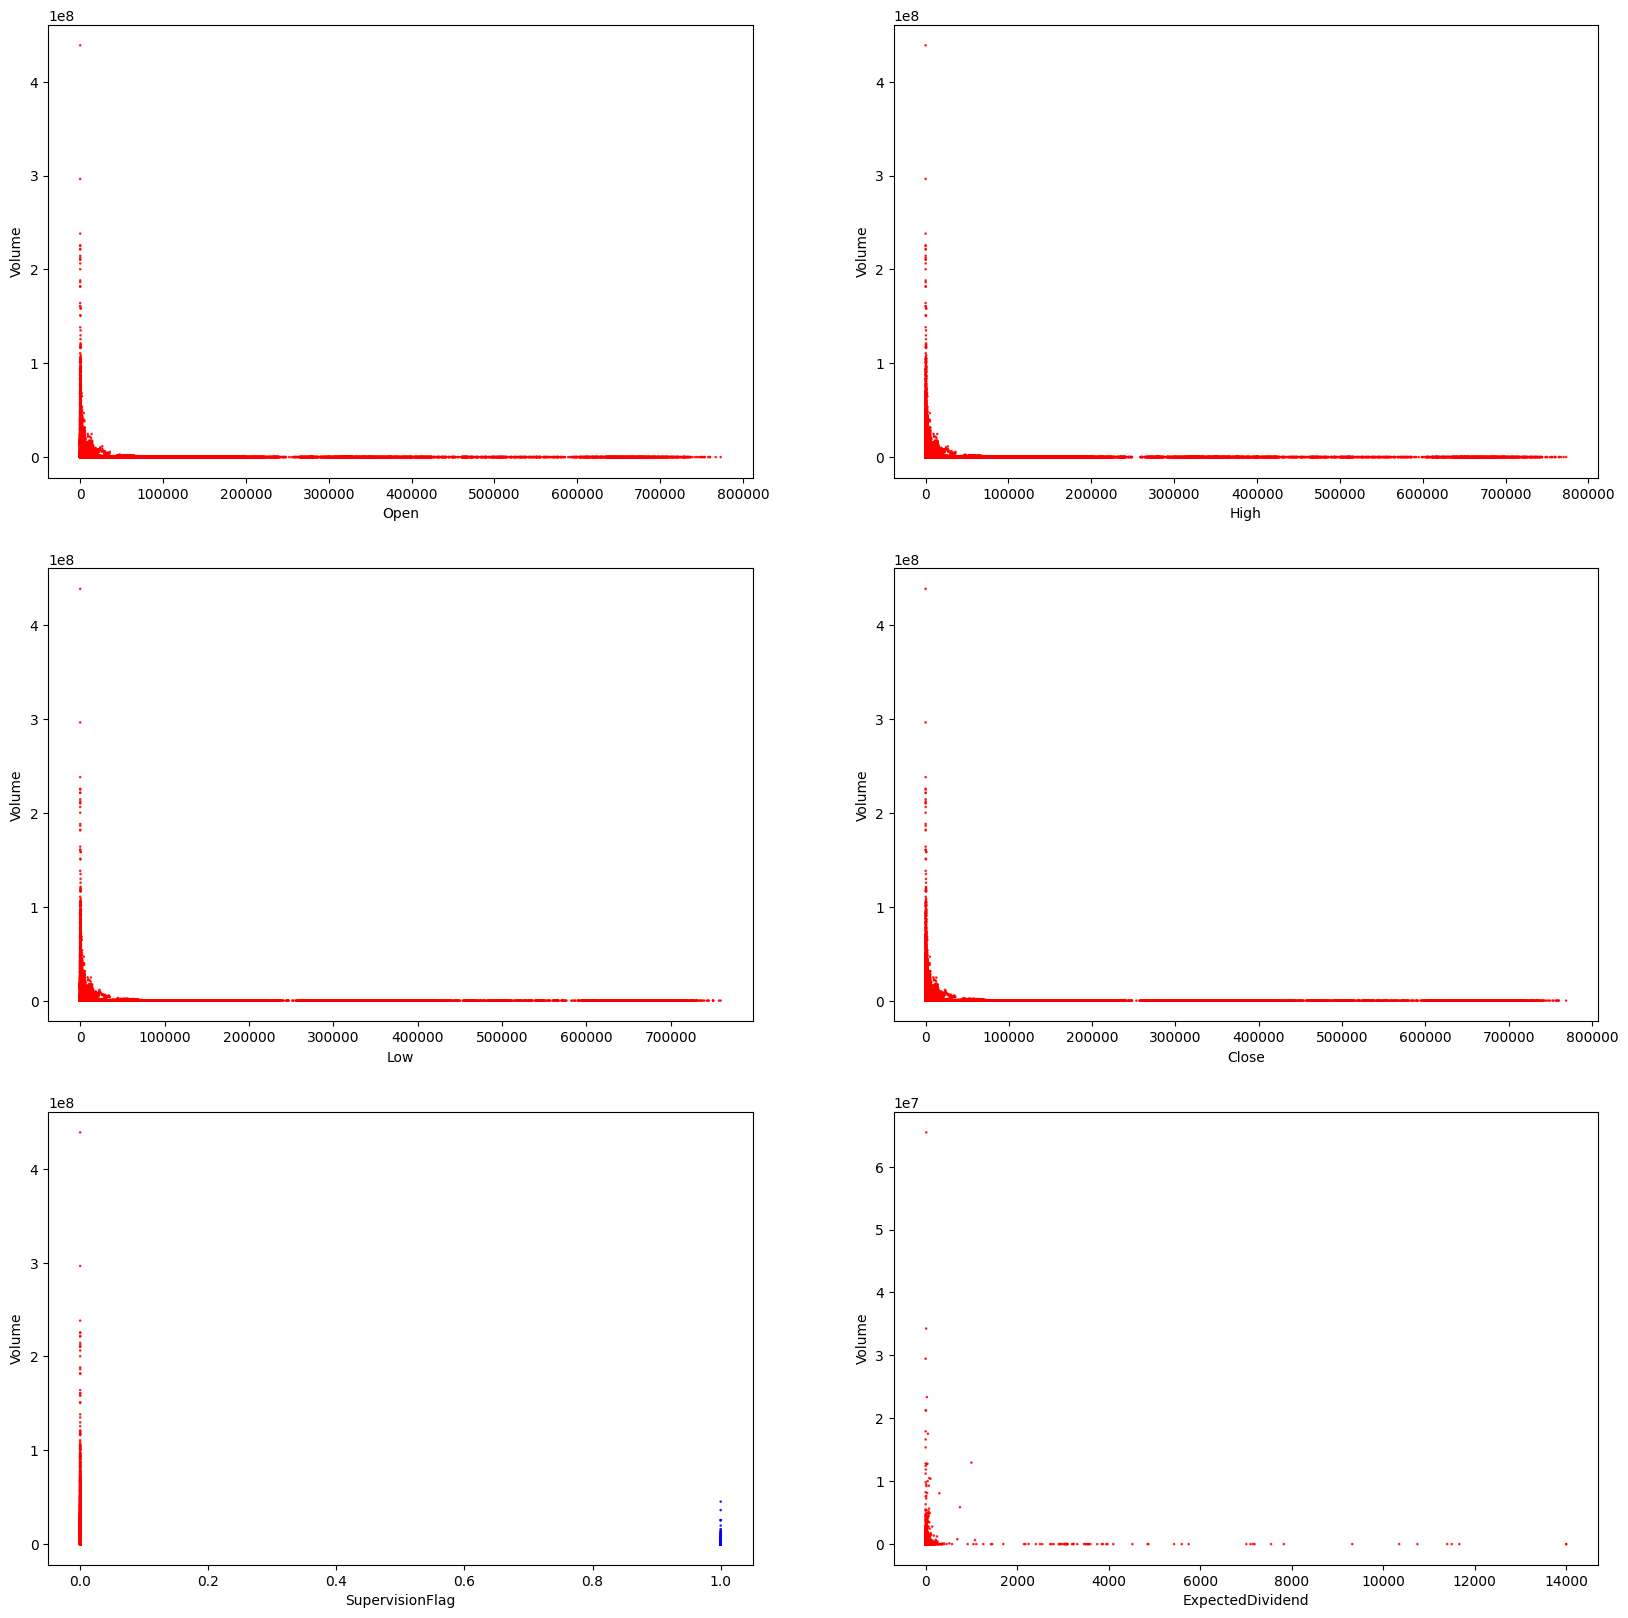

In [41]:
#taking Volume as target value
x_val = ['Open', 'High', 'Low', 'Close' , 'SupervisionFlag' , 'ExpectedDividend']
colours = {'False':'red', 'True':'blue'}

plot, axes = plt.subplots(3, 2, figsize = (20, 20))

y_data = stock_prices_df["Volume"]
supervision_flag = stock_prices_df["SupervisionFlag"]

for i, a in enumerate(axes.flat):
    x_data = stock_prices_df[x_val[i]]

    # Mapping colors based on "SupervisionFlag" column, using default color 'gray' for other values
    c = [colours.get(str(flag), 'blue') for flag in supervision_flag]

    a.scatter(x=x_data, y=y_data, c=c, s=3, alpha=0.8, marker='.')
    a.set_xlabel(x_val[i])
    a.set_ylabel('Volume')

plt.show()